Variable	Definition	Key

1. survival	Survival	0 = No, 1 = Yes

2. pclass	Ticket class	1 = 1st, 2 = 2nd, 3 = 3rd

3. sex	Sex	

4. Age	Age in years	

5. sibsp	# of siblings / spouses aboard the Titanic	

6. parch	# of parents / children aboard the Titanic	

7. ticket	Ticket number	

8. fare	Passenger fare

9. cabin	Cabin number	

10. embarked	Port of Embarkation	C = Cherbourg, Q = Queenstown, S = Southampton

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
titanic = pd.read_csv('Titanic.csv')

In [3]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [4]:
titanic.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [5]:
titanic.shape

(891, 12)

In [6]:
#Cek nilai kosong pada dataset titanic
titanic.isnull().any()

PassengerId    False
Survived       False
Pclass         False
Name           False
Sex            False
Age             True
SibSp          False
Parch          False
Ticket         False
Fare           False
Cabin           True
Embarked        True
dtype: bool

In [7]:
print('Data kosong AGE:\n',titanic['Age'].isnull().value_counts(),'\n')
print('Data kosong CABIN:\n',titanic['Cabin'].isnull().value_counts(),'\n')
print('Data kosong EMBARKED:\n',titanic['Embarked'].isnull().value_counts(),'\n')

Data kosong AGE:
 False    714
True     177
Name: Age, dtype: int64 

Data kosong CABIN:
 True     687
False    204
Name: Cabin, dtype: int64 

Data kosong EMBARKED:
 False    889
True       2
Name: Embarked, dtype: int64 



In [8]:
#Mengisi data umur yang kosong dengan rata-rata
titanic['Age'] = titanic['Age'].fillna(titanic['Age'].mean()) 

#Mengisi data Embarked dengan nilai tengah
titanic['Embarked'] = titanic['Embarked'].fillna(titanic['Embarked'].mode()[0])

#Menghapus data Cabin karena terlalu banyak kosong
titanic.drop(['Cabin'], axis = 1, inplace=True)

In [9]:
#Cek kembali untuk data yang kosong
titanic.isnull().any()

PassengerId    False
Survived       False
Pclass         False
Name           False
Sex            False
Age            False
SibSp          False
Parch          False
Ticket         False
Fare           False
Embarked       False
dtype: bool

In [10]:
#Merubah tipe data Umur ke int64
titanic['Age'] = titanic['Age'].astype('int64')

Jumlah dari data Survived 0 = Tidak dan 1 = Ya :
 0    549
1    342
Name: Survived, dtype: int64 



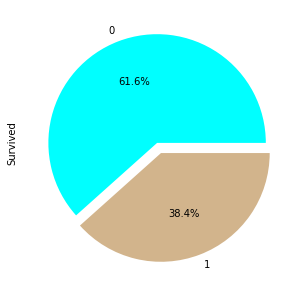

In [11]:
explode = (0, 0.1)
colrs=['cyan', 'tan']

print('Jumlah dari data Survived 0 = Tidak dan 1 = Ya :\n',titanic['Survived'].value_counts(),'\n')
titanic['Survived'].value_counts().plot.pie(autopct='%1.1f%%', figsize=(10,5), explode=explode, colors=colrs)

Jumlah dari data Pclass :
 3    491
1    216
2    184
Name: Pclass, dtype: int64 



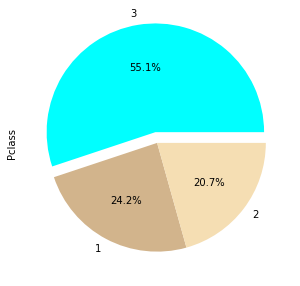

In [12]:
explode = (0.1, 0, 0)
colrs=['cyan', 'tan', 'wheat']

print('Jumlah dari data Pclass :\n',titanic['Pclass'].value_counts(),'\n')
titanic['Pclass'].value_counts().plot.pie(autopct='%1.1f%%', figsize=(10,5), explode=explode, colors=colrs)

Jumlah dari data Sex:
 male      577
female    314
Name: Sex, dtype: int64 



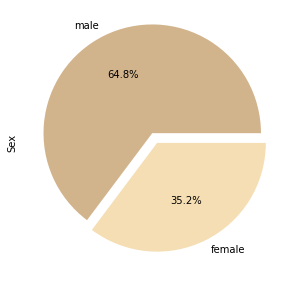

In [13]:
explode = (0.1, 0)
colrs=['tan', 'wheat']

print('Jumlah dari data Sex:\n', titanic['Sex'].value_counts(),'\n')
titanic['Sex'].value_counts().plot.pie(autopct='%1.1f%%', figsize=(10,5), explode=explode, colors=colrs)

Jumlah dari data Embarked:
 S    646
C    168
Q     77
Name: Embarked, dtype: int64 



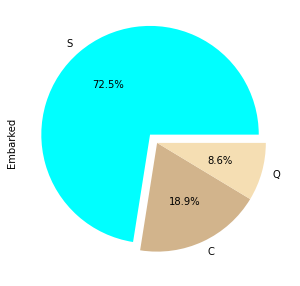

In [14]:
explode = (0.1, 0, 0)
colrs=['cyan', 'tan', 'wheat']

print('Jumlah dari data Embarked:\n', titanic['Embarked'].value_counts(),'\n')
titanic['Embarked'].value_counts().plot.pie(autopct='%1.1f%%', figsize=(10,5), explode=explode, colors=colrs)

Jumlah dari data SibSp:
 0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64 



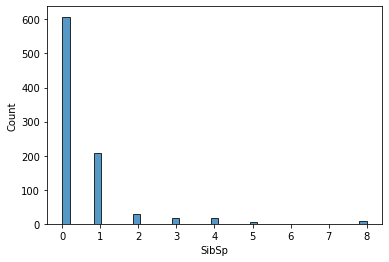

In [15]:
print('Jumlah dari data SibSp:\n', titanic['SibSp'].value_counts(),'\n')
sns.histplot(titanic['SibSp'])

Jumlah dari data Parch:
 0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64 



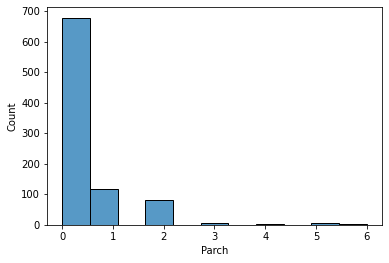

In [16]:
print('Jumlah dari data Parch:\n', titanic['Parch'].value_counts(),'\n')
sns.histplot(titanic['Parch'])

In [17]:
#Menghapus data PassengerId
titanic.drop(['PassengerId'], axis=1, inplace=True)

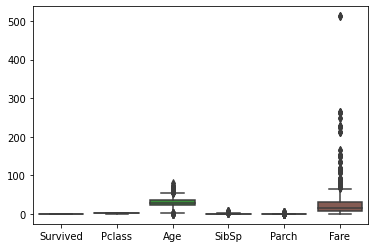

In [18]:
sns.boxplot(data=titanic)
plt.show()

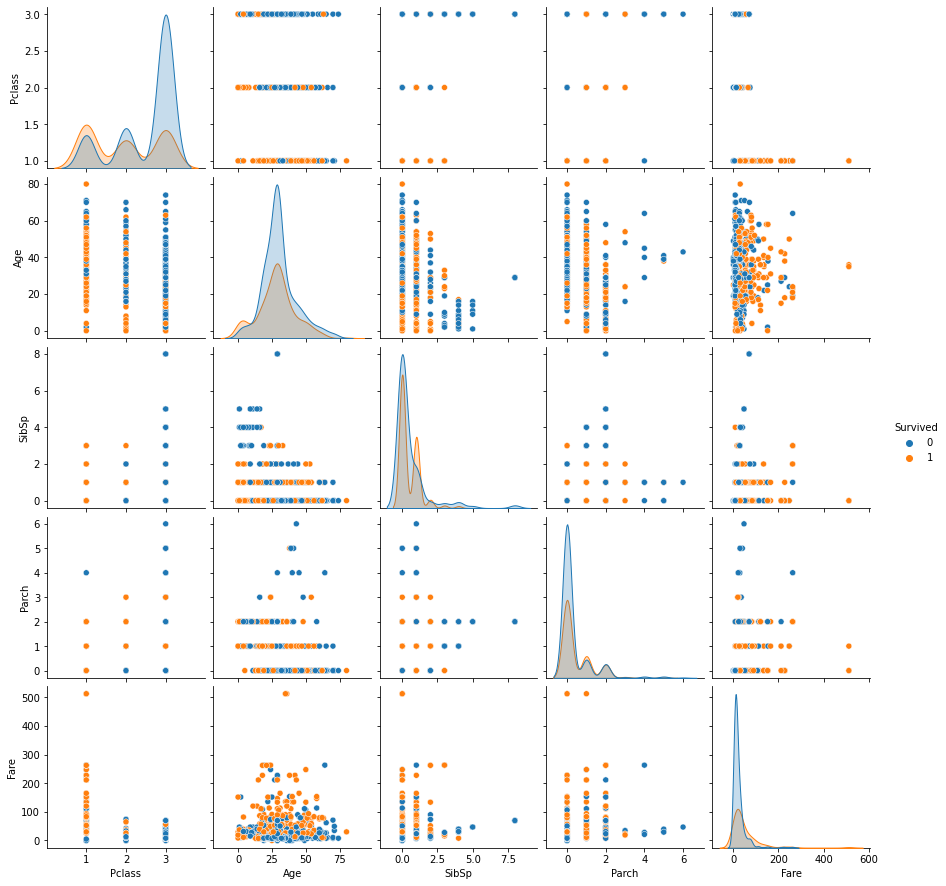

In [19]:
sns.pairplot(data=titanic, 
             hue='Survived')
plt.show()

In [20]:
korelasi = titanic.corr()
korelasi

,Survived,Pclass,Age,SibSp,Parch,Fare
Survived,1.000000,-0.338481,-0.067809,-0.035322,0.081629,0.257307
Pclass,-0.338481,1.000000,-0.335071,0.083081,0.018443,-0.549500
Age,-0.067809,-0.335071,1.000000,-0.232743,-0.176744,0.093856
SibSp,-0.035322,0.083081,-0.232743,1.000000,0.414838,0.159651
Parch,0.081629,0.018443,-0.176744,0.414838,1.000000,0.216225
Fare,0.257307,-0.549500,0.093856,0.159651,0.216225,1.000000


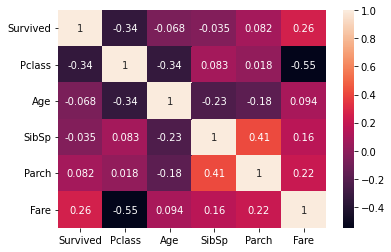

In [21]:
sns.heatmap(korelasi,
            annot=True)